In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib inline

In [2]:
state_regex = re.compile('^Estimated crime in (\w*)\s*$')
data_header_regex = re.compile('^Year,')

crime_by_state = {}
parser_state = 'wait_for_state'
with open("crime-by-state-source.csv") as f:
    for line in f:
        if parser_state == 'wait_for_state':
            m = state_regex.match(line)
            if m:
                state_name = m.group(1)
                parser_state = 'wait_for_data'
        elif parser_state == 'wait_for_data':
            if data_header_regex.match(line):
                parser_state = 'read_data'
                header = line.split(',')[:-1]
                data = []
        elif parser_state == 'read_data':
            if ',' in line:
                data.append(line.split(','))
            else:
                parser_state = 'wait_for_state'
                df = pd.DataFrame(data, columns=header)
                for col in df.columns:
                    df[col] = pd.to_numeric(df[col])
                df.index = df['Year']
                crime_by_state[state_name] = df
crime_by_state = pd.Panel(crime_by_state)

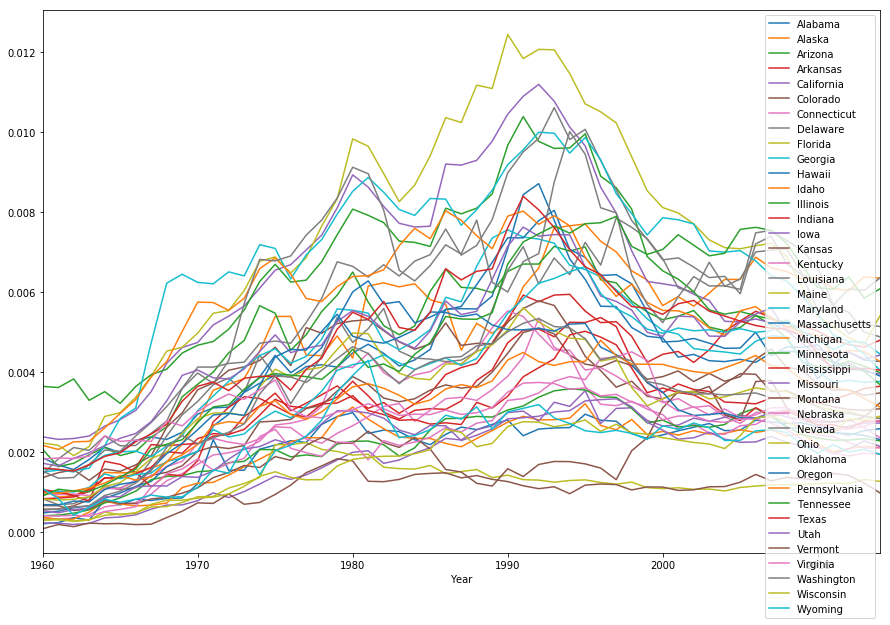

In [3]:
(crime_by_state.loc[:,:,'Violent crime total']/crime_by_state.loc[:,:,'Population']).plot(figsize=(15,10))

In [4]:
crime_total_per_capita = crime_by_state.loc[:,:,'Violent crime total']/crime_by_state.loc[:,:,'Population']

In [5]:
crime_total_per_capita.corr()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Oregon,Pennsylvania,Tennessee,Texas,Utah,Vermont,Virginia,Washington,Wisconsin,Wyoming
Alabama,1.000000,0.776954,0.880905,0.843501,0.883472,0.781413,0.911963,0.769012,0.917326,0.943796,...,0.774309,0.827064,0.791324,0.955701,0.826700,0.617206,0.658954,0.899938,0.803399,0.759903
Alaska,0.776954,1.000000,0.821449,0.908143,0.624366,0.665781,0.797080,0.917172,0.732231,0.788262,...,0.654773,0.942081,0.915890,0.810532,0.878781,0.777427,0.475205,0.823509,0.928062,0.751744
Arizona,0.880905,0.821449,1.000000,0.781652,0.910650,0.897863,0.933369,0.798902,0.948762,0.956907,...,0.903518,0.883756,0.770952,0.930149,0.941663,0.776062,0.780746,0.969151,0.763943,0.866717
Arkansas,0.843501,0.908143,0.781652,1.000000,0.600956,0.581067,0.771654,0.932399,0.723365,0.805310,...,0.545846,0.929824,0.970195,0.844652,0.791188,0.685395,0.423232,0.784040,0.952126,0.674952
California,0.883472,0.624366,0.910650,0.600956,1.000000,0.912159,0.928419,0.587302,0.969470,0.934719,...,0.943557,0.695943,0.551439,0.897642,0.837915,0.631210,0.808309,0.932184,0.572294,0.804526
Colorado,0.781413,0.665781,0.897863,0.581067,0.912159,1.000000,0.880225,0.589213,0.871308,0.857702,...,0.933018,0.703979,0.520831,0.816996,0.835519,0.767911,0.780555,0.919059,0.561449,0.839008
Connecticut,0.911963,0.797080,0.933369,0.771654,0.928419,0.880225,1.000000,0.773746,0.963795,0.968028,...,0.905445,0.858172,0.737398,0.955344,0.914034,0.798972,0.662559,0.968349,0.785028,0.899053
Delaware,0.769012,0.917172,0.798902,0.932399,0.587302,0.589213,0.773746,1.000000,0.725328,0.791251,...,0.564094,0.964050,0.957283,0.829255,0.850682,0.721125,0.491020,0.785254,0.909298,0.719534
Florida,0.917326,0.732231,0.948762,0.723365,0.969470,0.871308,0.963795,0.725328,1.000000,0.974906,...,0.914512,0.814893,0.701044,0.958748,0.894438,0.677850,0.778748,0.957970,0.704852,0.841920
Georgia,0.943796,0.788262,0.956907,0.805310,0.934719,0.857702,0.968028,0.791251,0.974906,1.000000,...,0.880183,0.867813,0.771431,0.962566,0.907027,0.724860,0.741144,0.959768,0.773769,0.848011


** I am adding a column for Violent crime per capita to each dataframe of the _crime_\__by_\__state_ panel **

In [6]:
from os import listdir
from os.path import isfile, join

# Adding a new column 'Violent crime per capita' to each state
for state in crime_by_state:
    crime_by_state[state]['Violent crime per capita'] = crime_by_state.loc[state,:,'Violent crime total']/crime_by_state.loc[state,:,'Population']
    crime_by_state[state]['Total Expenditures for Education'] = np.nan # Prepare column to accept data
    crime_by_state[state]['Total Expenditures for Education per capita'] = np.nan # Prepare column to accept data

files = [f for f in listdir('budget') if isfile(join('budget', f))]

** We will now add data about funding sourced from [National Center for Education Statistics](https://nces.ed.gov/ccd/stfis.asp). **

Note that according to the [documentation for Fiscal Year 2014](https://nces.ed.gov/ccd/data/txt/stfis14_1a_lay.txt):
> **Missing data are reported as "-1" in the data 
file, and nonapplicable data are reported as "-2."**

Also, according to the [documentation for Fiscal Year 1991](https://nces.ed.gov/ccd/pdf/stfis91genr.pdf):
> **NCES requests that states report 0 for items in which no activity occurred and M for items in which an
activity occurred, but no data are available. Review of the data and subsequent discussions suggests
that these practices are not always followed. In some instances, an M may have been reported when
there was no activity. Conversely, a 0 may have been used when in fact there was some activity. When
producing the final file, NCES edited some missing and 0 responses.**

In [7]:
def cutoff(dummydf):
    if len(dummydf.index) > 60:
        return len(dummydf.index) - 56 - accountfornanrows(dummydf)
    return 0

def accountfornanrows(dummydf):
    if checkfirstrow == None:
        return 0
    else:
        return 1

def checkfirstrow(dummydf):
    if dummydf.iloc[0, 0] == int and np.isnan(dummydf.iloc[0, 0]): # For some weird reason, stfis971b.xls returns str type at the first cell. Seem to be because the dtype is int64
        return 1
    else:
        return None

    
def determine_year(dummydf):
    # Get the year from the index.
    # I chose a random number inbetween because NaN frequently occurs at the beginning
    # and end of some dataframes
    year = int(dummydf.index[5])
    if year > 100:
        return year
    return 1900 + year
    
def te11col(year):
    '''1987-1988 -->
    1989-91 --> DU
    1992, 3, 4, 5, 96,97,1998, --> EJ
    1998, 1999, 2000, 2001, 2, 3, --> EF
    2004-2014 --> EK'''
    if year < 1992:
        return 'DU'
    if year < 1998:
        return 'EJ'
    if year < 2004:
        return 'EF'
    return 'EK'



funding_by_year = {}

for file in files:
    filepath = join('budget', file)
    probe = pd.read_excel(filepath, parse_cols='A, D', index_col=0)#, squeeze=True) # Apparently, two columns are needed to accurately determine column depth
    year = determine_year(probe)
    #Note:
    # A: Year
    # D: State
    # te11col(year): location ot TE11 column
    data = pd.read_excel(filepath, parse_cols='A, D, '+ te11col(year), skiprows=[checkfirstrow(probe)], skip_footer=cutoff(probe),
                         na_values=[-1, -1.0, 'M'], header=0,index_col=1)#, index_col=0) # For some weird reason, the -1 in stfis051b.xls is not being replaced
    data["SURVYEAR"] = year
    for column in data.columns:
        data[column] = pd.to_numeric(data[column])
        data[column]
    funding_by_year[year] = data
    

funding_by_year = pd.Panel(funding_by_year)  #Produced the error: InvalidIndexError: Reindexing only valid with uniquely valued Index objects

From the result above, it appears that the total expenditure (TE11) was not collected between **1988-1989**. This is mentioned on page 4 of [the documentation for the fiscal year 1987](https://nces.ed.gov/ccd/pdf/stfis87genr.pdf):

> **"Beginning with the FY 1989 collection, the CCD State Fiscal survey underwent a major revision. The
crosswalk (below) indicates the changes in the variable names. The expenditures in the pre-FY 1989
files may contain some expenditures by state education agencies that are excluded from the NPEFS
(post-FY 1988) survey."**

We now populate the available figures for public expenditure in the original Numpy Panel object, **crime_by_state**:

In [8]:
for year in funding_by_year:
    for state in crime_by_state:
        crime_by_state[state]['Total Expenditures for Education'][year] = funding_by_year[year]['TE11'][state]
    
for state in crime_by_state:
    print(crime_by_state[state]['Total Expenditures for Education'])
    print(state)
# Observation: Some states in the second data source are not present in the first data source, e.g. Guam

Year
1960             NaN
1961             NaN
1962             NaN
1963             NaN
1964             NaN
1965             NaN
1966             NaN
1967             NaN
1968             NaN
1969             NaN
1970             NaN
1971             NaN
1972             NaN
1973             NaN
1974             NaN
1975             NaN
1976             NaN
1977             NaN
1978             NaN
1979             NaN
1980             NaN
1981             NaN
1982             NaN
1983             NaN
1984             NaN
1985             NaN
1986             NaN
1987             NaN
1988             NaN
1989    2.495619e+09
1990    2.537422e+09
1991    2.705632e+09
1992    2.664059e+09
1993    2.860729e+09
1994    3.097923e+09
1995    3.328826e+09
1996    3.589243e+09
1997    3.951770e+09
1998    4.201148e+09
1999    4.570867e+09
2000    4.935621e+09
2001    4.991181e+09
2002    5.055209e+09
2003    5.198828e+09
2004    5.369962e+09
2005    5.785155e+09
2006    6.480739e+09
2007    

** Next, we normalize the "Total Expenditures for Education" by calculating the Total Expenditures for Education per capita **

In [9]:
for state in crime_by_state:
    crime_by_state[state]['Total Expenditures for Education per capita'] = crime_by_state.loc[state,:,'Total Expenditures for Education']/crime_by_state.loc[state,:,'Population']
    print(crime_by_state[state]['Total Expenditures for Education per capita'])

Year
1960            NaN
1961            NaN
1962            NaN
1963            NaN
1964            NaN
1965            NaN
1966            NaN
1967            NaN
1968            NaN
1969            NaN
1970            NaN
1971            NaN
1972            NaN
1973            NaN
1974            NaN
1975            NaN
1976            NaN
1977            NaN
1978            NaN
1979            NaN
1980            NaN
1981            NaN
1982            NaN
1983            NaN
1984            NaN
1985            NaN
1986            NaN
1987            NaN
1988            NaN
1989     606.026971
1990     627.983449
1991     661.685577
1992     644.114761
1993     683.240743
1994     734.278911
1995     782.700719
1996     839.981978
1997     914.973387
1998     965.337381
1999    1045.998067
2000    1109.851638
2001    1116.867221
2002    1128.673101
2003    1154.339348
2004    1186.633505
2005    1271.930233
2006    1409.153556
2007    1528.227899
2008    1667.397833
2009    1640.78

Name: Total Expenditures for Education per capita, dtype: float64
Year
1960            NaN
1961            NaN
1962            NaN
1963            NaN
1964            NaN
1965            NaN
1966            NaN
1967            NaN
1968            NaN
1969            NaN
1970            NaN
1971            NaN
1972            NaN
1973            NaN
1974            NaN
1975            NaN
1976            NaN
1977            NaN
1978            NaN
1979            NaN
1980            NaN
1981            NaN
1982            NaN
1983            NaN
1984            NaN
1985            NaN
1986            NaN
1987            NaN
1988            NaN
1989     612.617177
1990     676.830864
1991     765.834682
1992     817.767032
1993     807.064224
1994     847.794409
1995     935.232321
1996     991.851958
1997    1051.251833
1998    1076.195124
1999    1112.234808
2000    1129.662731
2001    1161.386501
2002    1234.646320
2003    1246.234819
2004    1252.201273
2005    1262.900129
2006    1

**For now, it appears that we are done collating data. The next phase is gaining insights from the data. We have to correlate the crime rate with public spending. We might need to take account of complicating factors like the time lag between change in public spending and any societal effect like reduction in crime rate.**